In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from utiles import*

#   Importation de la data
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Mailing_project\data\DataSet_Emails.csv", index_col= "Unnamed: 0")

#   Apercu de notre data
df.head()

,message_id,text,label,label_text,subject,message,date
0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


In [22]:
#   Taille du tableau
df.shape

(31716, 7)

In [23]:
#   Types de nos donnees
df.dtypes

message_id     int64
text          object
label          int64
label_text    object
subject       object
message       object
date          object
dtype: object

In [24]:
# Valeurs null de notre Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31716 entries, 0 to 31715
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   message_id  31716 non-null  int64 
 1   text        31665 non-null  object
 2   label       31716 non-null  int64 
 3   label_text  31716 non-null  object
 4   subject     31442 non-null  object
 5   message     31371 non-null  object
 6   date        31716 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.9+ MB


In [25]:
#   Analyse des valeurs manquanntes dans la data
df.isnull().sum()

message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

In [26]:
#   Analyse des doublons de notre data a partir de la colonne messade_id
print(df.duplicated(subset= "text", keep= 'first').sum())

2904


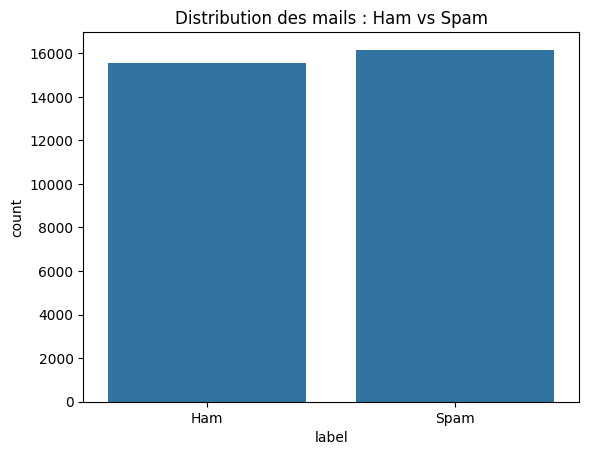

In [27]:
#   Etude de la distribution entre les variables 
#   Nombre de spam vs nombre de ham
sns.countplot(x=df["label"])
plt.xticks([0, 1], ["Ham", "Spam"])
plt.title("Distribution des mails : Ham vs Spam")
plt.savefig(r"C:\Users\Lenovo\Desktop\Mailing_project\figures\Distribution_des_mails.png")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22516\1660427474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="label", y="text_length", data=df, palette=["blue", "red"])


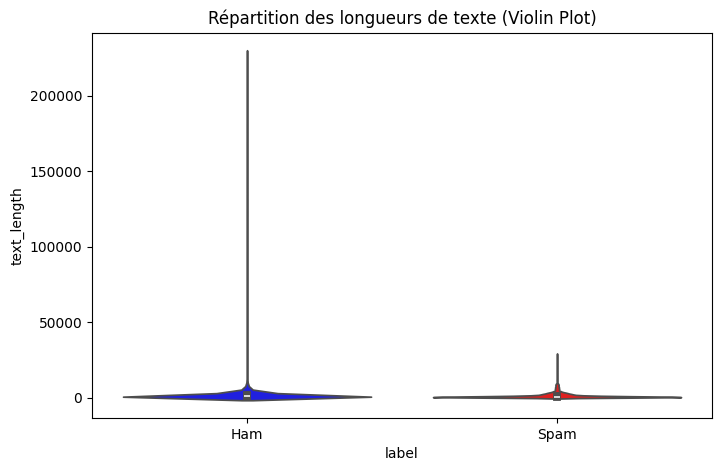

In [28]:
#   Longueur des spam vs des ham
df["text_length"] = df["text"].str.len()
plt.figure(figsize=(8, 5))
sns.violinplot(x="label", y="text_length", data=df, palette=["blue", "red"])
plt.xticks([0, 1], ["Ham", "Spam"])
plt.title("Répartition des longueurs de texte (Violin Plot)")
plt.savefig(r"C:\Users\Lenovo\Desktop\Mailing_project\figures\Violin_Plot.png")
plt.show()



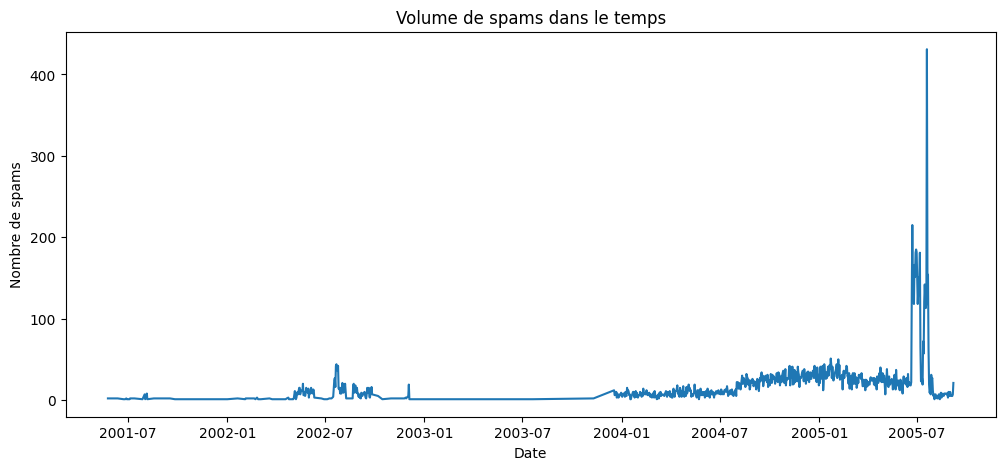

In [29]:
#   Nombre de spams par dates
df["date"] = pd.to_datetime(df["date"])
spam_over_time = df[df["label"] == 1].groupby(df["date"].dt.date).size()

spam_over_time.plot(figsize=(12, 5), title="Volume de spams dans le temps")
plt.xlabel("Date")
plt.ylabel("Nombre de spams")
plt.savefig(r"C:\Users\Lenovo\Desktop\Mailing_project\figures\Volume_de_hams_dans_le_temps.png")
plt.show()

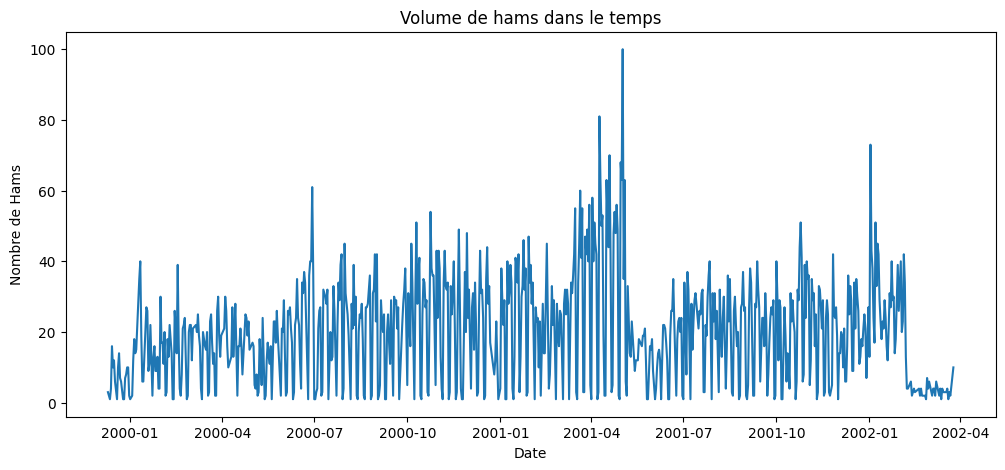

In [30]:
#   Nombre de hams par dates
df["date"] = pd.to_datetime(df["date"])
spam_over_time = df[df["label"] == 0].groupby(df["date"].dt.date).size()

spam_over_time.plot(figsize=(12, 5), title="Volume de hams dans le temps")
plt.xlabel("Date")
plt.ylabel("Nombre de Hams")
plt.savefig(r"C:\Users\Lenovo\Desktop\Mailing_project\figures\Volume_de_hams_dans_le_temps.png")

plt.show()

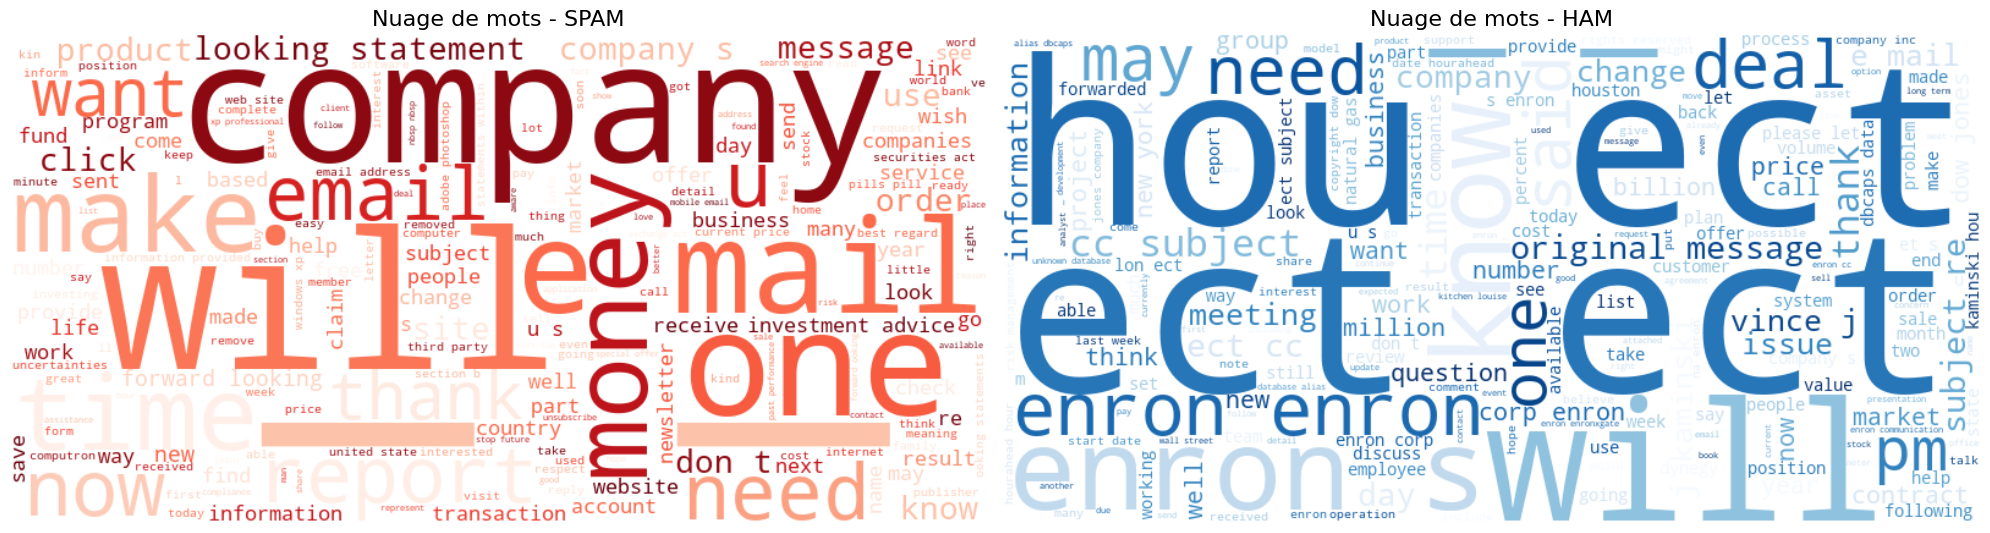

In [31]:
# Travaillons sur la colonne "text"
df["text_filled"] = df["text"].fillna("").str.lower()

# Séparation des spams et hams
spam_text = " ".join(df[df["label"] == 1]["text_filled"])
ham_text = " ".join(df[df["label"] == 0]["text_filled"])

# Création des nuages
spam_wc = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(spam_text)
ham_wc = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(ham_text)

# Affichage côte à côte
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots - SPAM", fontsize=16)
plt.savefig(r"C:\Users\Lenovo\Desktop\Mailing_project\figures\Nuage_de_mots_SPAM.png")


plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots - HAM", fontsize=16)
plt.savefig(r"C:\Users\Lenovo\Desktop\Mailing_project\figures\Nuage_de_mots_HAM.png")
plt.tight_layout()
plt.show()

In [32]:
df["text_length"].head()

0     156.0
1    1112.0
2     242.0
3     127.0
4     329.0
Name: text_length, dtype: float64

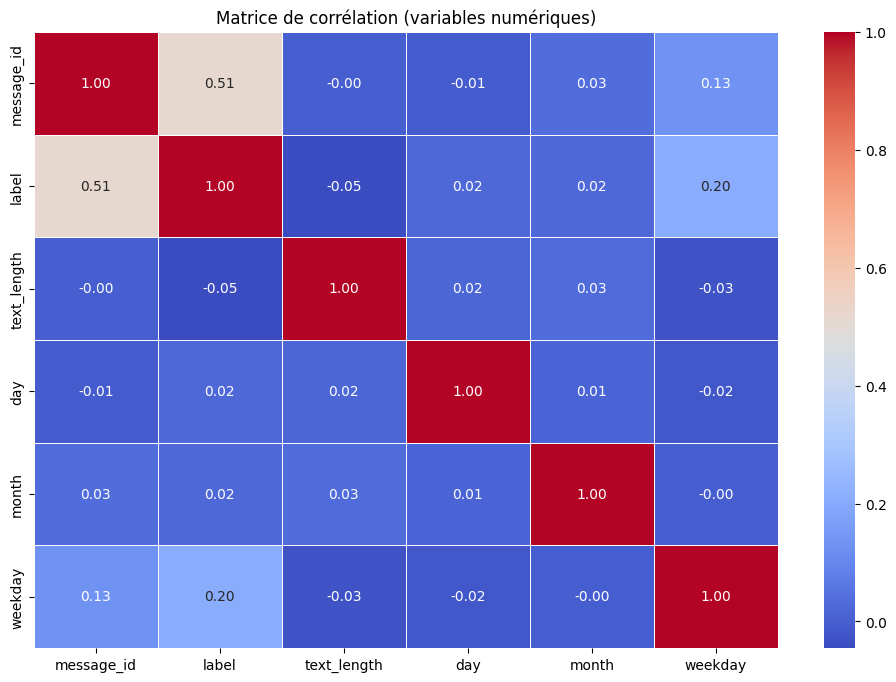

In [33]:
#   Matrice de correlation entre les variables numeriques
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["weekday"] = df["date"].dt.weekday
df.dtypes
matrice = df.corr(numeric_only= True)

plt.figure(figsize=(12, 8))
sns.heatmap(matrice, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation (variables numériques)")
plt.savefig(r"C:\Users\Lenovo\Desktop\Mailing_project\figures\Matrice_de_corrélation.png")
plt.show()

In [34]:
df_analysed = df.copy()

In [35]:
df_analysed.info()
df_analysed.to_csv(r"C:\Users\Lenovo\Desktop\Mailing_project\data\DataSetUtile.csv", index= False)

<class 'pandas.core.frame.DataFrame'>
Index: 31716 entries, 0 to 31715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   message_id   31716 non-null  int64         
 1   text         31665 non-null  object        
 2   label        31716 non-null  int64         
 3   label_text   31716 non-null  object        
 4   subject      31442 non-null  object        
 5   message      31371 non-null  object        
 6   date         31716 non-null  datetime64[ns]
 7   text_length  31665 non-null  float64       
 8   text_filled  31716 non-null  object        
 9   day          31716 non-null  int32         
 10  month        31716 non-null  int32         
 11  weekday      31716 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(5)
memory usage: 3.8+ MB
